# Predictions based on second vector - v2

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth

In [2]:
model_data = pd.read_csv('learning_vectors/v02/version02-FIFAtransfermarkt.csv', sep=',')
model_data = model_data.set_index(['Match_id'])

model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                      'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                      'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
                      'H_age', 'A_age',
                      'H_TMV', 'A_TMV']

print(model_data.shape)
# model_data.head()


(6080, 27)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison:

In [4]:
features = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
            'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
            'H_age', 'A_age',
            'H_TMV', 'A_TMV']

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_v2.txt','w')

print(model_data[features].shape)
model_data[features].head()


(6080, 20)


,H_Speed,H_Pass,H_Shoot,H_Pressure,H_chPass,H_chCross,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth,H_age,A_age,H_TMV,A_TMV
Match_id,,,,,,,,,,,,,,,,,,,,
1730,66,30,35,30,30,45,40,50,65,40,55,70,70,70,70,70,21.3,24.6,250.0,64.0
1731,60,70,55,35,70,70,70,35,50,35,70,40,50,60,60,40,24.9,23.9,91.0,257.0
1732,58,30,50,30,31,70,70,30,70,70,50,35,70,70,70,35,24.3,25.7,80.0,61.0
1734,60,65,45,40,60,70,70,40,55,70,55,45,60,70,70,45,24.4,26.4,162.0,86.0
1735,70,70,50,30,70,70,70,30,70,50,50,50,50,65,50,50,22.3,22.5,73.0,212.0


In [5]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



### Basic comparison:

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR 	0.534375 	(0.005705)
LDA 	0.533717 	(0.006230)
KNN 	0.484375 	(0.016424)
CART 	0.436513 	(0.007915)
NB 	0.501974 	(0.016302)
SVM 	0.473026 	(0.004238)


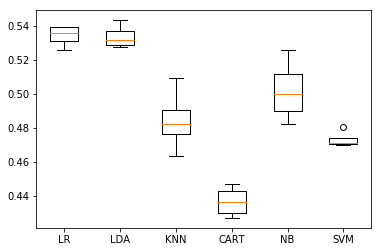

In [6]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR 	0.534211 	(0.018415)
LDA 	0.534539 	(0.009874)
KNN 	0.471053 	(0.010537)
CART 	0.421711 	(0.005640)
NB 	0.508388 	(0.017114)
SVM 	0.529770 	(0.005104)


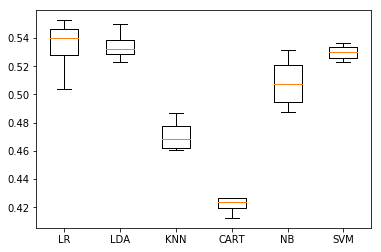

In [7]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)

## Other models comparison:

-- Other comparison --
Algo: 	res.mean: 	res.std:
LR 	0.535197 	(0.022535)
LDA 	0.535855 	(0.008534)
KNN 	0.474836 	(0.004975)
CART 	0.422368 	(0.013051)
NB 	0.526480 	(0.001882)
SVM 	0.457401 	(0.005373)


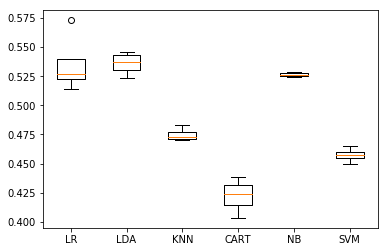

In [8]:
features = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

X = model_data[features]
y = model_data['Result']

compare_algs(X, y, cross_validator, scoring_type)
